# *in this project we will predicting profit or lose incomparision of the closing stock price *

In [ ]:
!pip install yfinance
import yfinance as yf #this lib bring the stock market data
import os

In [ ]:
if os.path.exists("sp_stock.csv"):
  sp_stock = pd.read_csv('sp_stock.csv', index_col=0)
else:
  sp_stock = yf.Ticker('^GSPC')#this will initate sp_stock for top 500 company performance
  sp_stock = sp_stock.history(period = 'max')
  sp_stock.to_csv("sp_stock.csv")

In [ ]:
sp_stock.index = pd.to_datetime(sp_stock.index)

<Axes: xlabel='Date'>

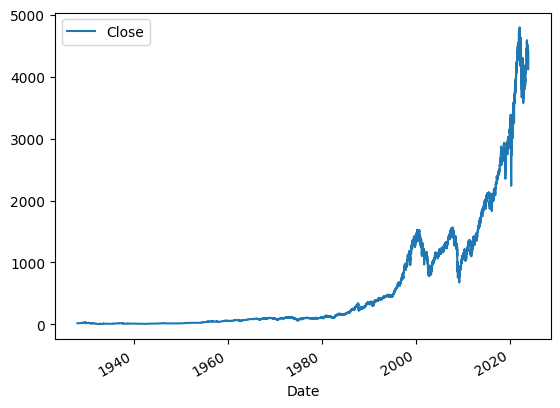

In [ ]:
sp_stock.plot.line(y = 'Close', use_index = True)

In [ ]:
if "Dividends" in sp_stock.keys():
    del sp_stock["Dividends"]
if "Stock Splits" in sp_stock.keys():
    del sp_stock["Stock Splits"]
sp_stock

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000
2023-11-08 00:00:00-05:00,4384.370117,4391.200195,4359.759766,4382.779785,3729510000


setting up the tragte columne for machine learniing
  

In [ ]:
sp_stock["tomorrow"] = sp_stock['Close'].shift(-1)
sp_stock

,Open,High,Low,Close,Volume,tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4382.779785
2023-11-08 00:00:00-05:00,4384.370117,4391.200195,4359.759766,4382.779785,3729510000,4347.350098


In [ ]:
sp_stock['Target'] = (sp_stock['tomorrow']>sp_stock['Close']).astype(int)
sp_stock

,Open,High,Low,Close,Volume,tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883,1
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4382.779785,1
2023-11-08 00:00:00-05:00,4384.370117,4391.200195,4359.759766,4382.779785,3729510000,4347.350098,0


removing old unneeded data

In [ ]:
# sp_stock = sp_stock.loc['1990-01-01':].copy()

traing model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split= 100, random_state = 1)
train = sp_stock.iloc[:-100]
test = sp_stock.iloc[-100:]

predictors = ['Close', "Volume", 'Open','High',"Low"]
model.fit(train[perdictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[perdictors])
preds = pd.Series(preds, index = test.index)
precision_score(test['Target'], preds)

0.4852941176470588

<Axes: xlabel='Date'>

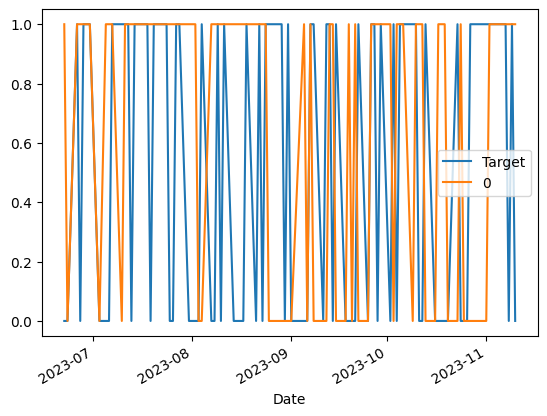

In [ ]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

In [ ]:
def predict(tain, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name = 'predictions')
  combined = pd.concat([test['Target'], preds], axis = 1)
  return combined

In [ ]:
def backtest(data, model, predictors, start = 2500, step = 250):
  all_predi = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predi.append(predictions)
    return pd.concat(all_predi)


In [ ]:
predictions_stock = backtest(sp_stock, model, predictors)


In [ ]:
predictions_stock['predictions'].value_counts()

In [ ]:
precision_score(predictions['Target'], predictions['predictions'])

In [ ]:
predictions['Target'].value_counts() / predictions.shape[0]

In [ ]:
horizons = [2, 5, 60, 250, 1000]
new_predictiors = []
for horizon in horizons:
  rolling_avg = sp_stock.rolling (horizon).mean()
  ration_col = f'close_Ration_{horizon}'
  sp_stock[ration_col] = sp_stock['Close']/ rolling_avg['Close']
  trend_col = f'Trend_{horizon}'
  sp_stock[trend_col] = sp_stock.shift(1).rolling(horizon).sum()['Target']
  new_predictiors += [ration_col, trend_col]



In [ ]:
sp_stock = sp_stock.dropna(subset = sp_stock.columns[sp_stock.columns != 'tomorrow'])

In [ ]:
sp_stock

,Open,High,Low,Close,Volume,tomorrow,Target,close_Ration_2,Trend_2,close_Ration_5,Trend_5,close_Ration_60,Trend_60,close_Ration_250,Trend_250,close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1931-12-29 00:00:00-05:00,7.960000,7.960000,7.960000,7.960000,0,8.100000,1,1.012723,1.0,0.996994,3.0,0.821282,24.0,0.582074,105.0,0.394305,521.0
1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,3.0,0.837787,25.0,0.593657,105.0,0.401432,521.0
1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,2.0,1.017544,4.0,0.842149,25.0,0.596489,105.0,0.402615,522.0
1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,1.0,0.956962,3.0,0.785781,25.0,0.556754,104.0,0.375034,522.0
1932-01-05 00:00:00-05:00,7.550000,7.550000,7.550000,7.550000,0,8.080000,1,0.999338,0.0,0.960804,3.0,0.787963,24.0,0.557255,104.0,0.374726,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06 00:00:00-05:00,4364.270020,4372.209961,4347.529785,4365.979980,3656340000,4378.379883,1,1.000876,2.0,1.016585,5.0,1.002063,30.0,1.043131,126.0,1.114182,527.0
2023-11-07 00:00:00-05:00,4366.209961,4386.259766,4355.410156,4378.379883,3791230000,4382.779785,1,1.001418,2.0,1.010784,5.0,1.005337,30.0,1.045544,126.0,1.116987,527.0
2023-11-08 00:00:00-05:00,4384.370117,4391.200195,4359.759766,4382.779785,3729510000,4347.350098,0,1.000502,2.0,1.005074,5.0,1.006560,31.0,1.045961,127.0,1.117750,527.0


better model

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split = 50, random_state = 1)

In [ ]:
def predcit(train, test, predictors, model):
  model.fit(train[predictors], train['Target'])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6] = 1
  preds[preds<.6] = 0
  preds = pd.Serise(preds, index = test.index , name = 'predictions')
  combined = pd.concat([test['Target'], preds], axis = 1)
  return combined


In [ ]:
predictions['predictions'].value_counts()

0    182
1     68
Name: predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["predictions"])

0.8529411764705882

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.516
1    0.484
Name: Target, dtype: float64

In [ ]:
predictions

,Target,predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,1
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,1
...,...,...
2000-11-09 00:00:00-05:00,0,0
2000-11-10 00:00:00-05:00,0,1
2000-11-13 00:00:00-05:00,1,1
